In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#!f2py -c nufft3df90.pyf dfftpack.f next235.f nufft3df90.f

In [4]:
from Poisson_Cyl_Sphere import Poisson_Cyl_Sphere as p_solver

In [5]:
rho=10.0                   ## density inside sphere
R0=0.2                     ## radius of sphere
x0, y0, z0 = 1.0, 1.0, 0.5 ## center of the sphere
NN=32                      ## resolution

In [6]:
convl_sphere = p_solver(rho=rho, R0=R0, x0=x0, y0=y0, z0=z0, NN=NN, method="convolution")
nufft_sphere = p_solver(rho=rho, R0=R0, x0=x0, y0=y0, z0=z0, NN=NN, method="nufft")

In [7]:
#help(nufft_sphere)

In [8]:
convl_potential = convl_sphere.solve()

In [9]:
convl_analytic  = convl_sphere.analytic_sol()
convl_error     = convl_sphere.error()
convl_error_rel = convl_error/convl_analytic
convl_L1        = convl_sphere.L1_error()

In [10]:
nufft_potential = nufft_sphere.solve()

In [11]:
nufft_analytic  = nufft_sphere.analytic_sol()
nufft_error     = nufft_sphere.error()
nufft_error_rel = nufft_error/nufft_analytic
nufft_L1        = nufft_sphere.L1_error()

In [12]:
crt_x1, crt_x2, crt_x3 = nufft_sphere.get_crt_coord()

Text(0.5,0.98,'N = 32')

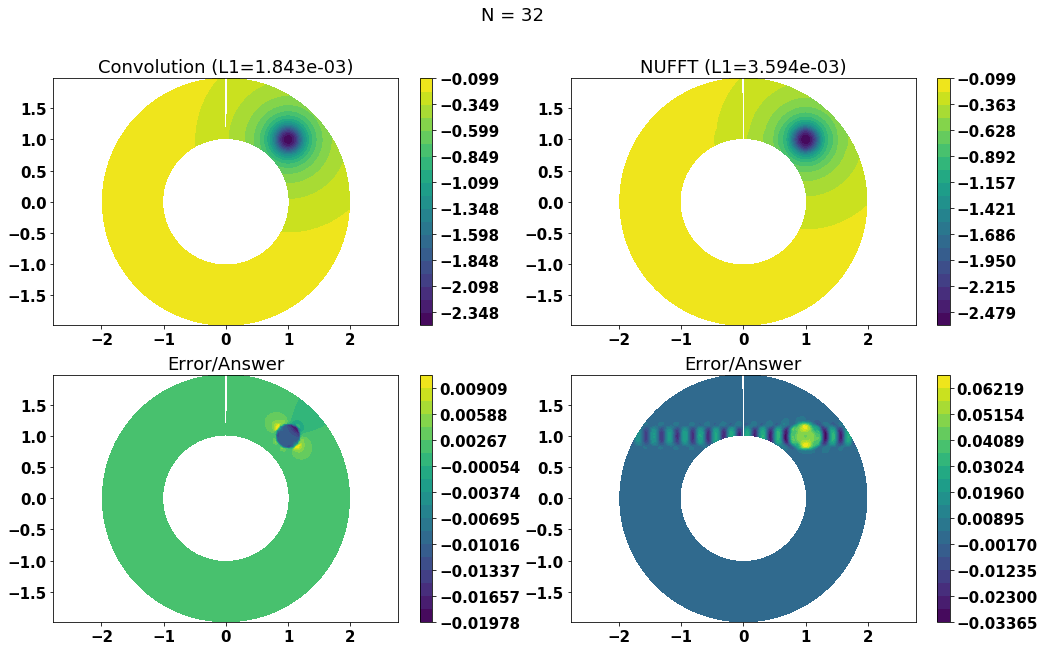

In [13]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution (L1=" + format(convl_L1, ".3e") + ")")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT (L1=" + format(nufft_L1, ".3e") + ")")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN))

Text(0.5,0.98,'N = 32, L1 = 0.00184295983066')

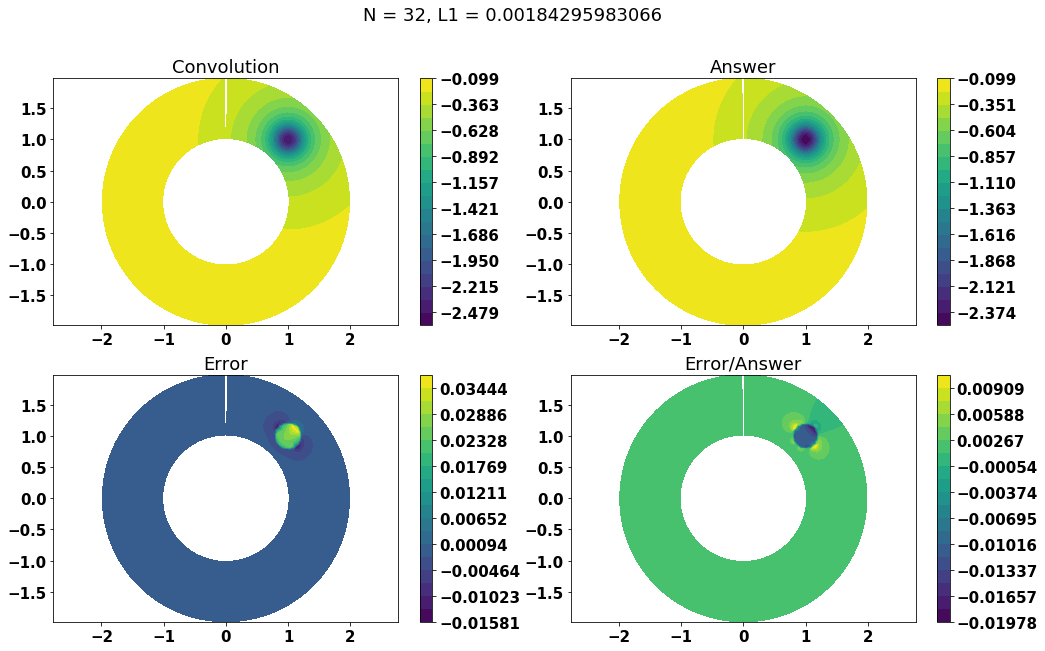

In [14]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error[:,:,plan], 
             levels=np.linspace(np.min(convl_error[:,:,plan]), np.max(convl_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(convl_L1))

Text(0.5,0.98,'N = 32, L1 = 0.00359359036651')

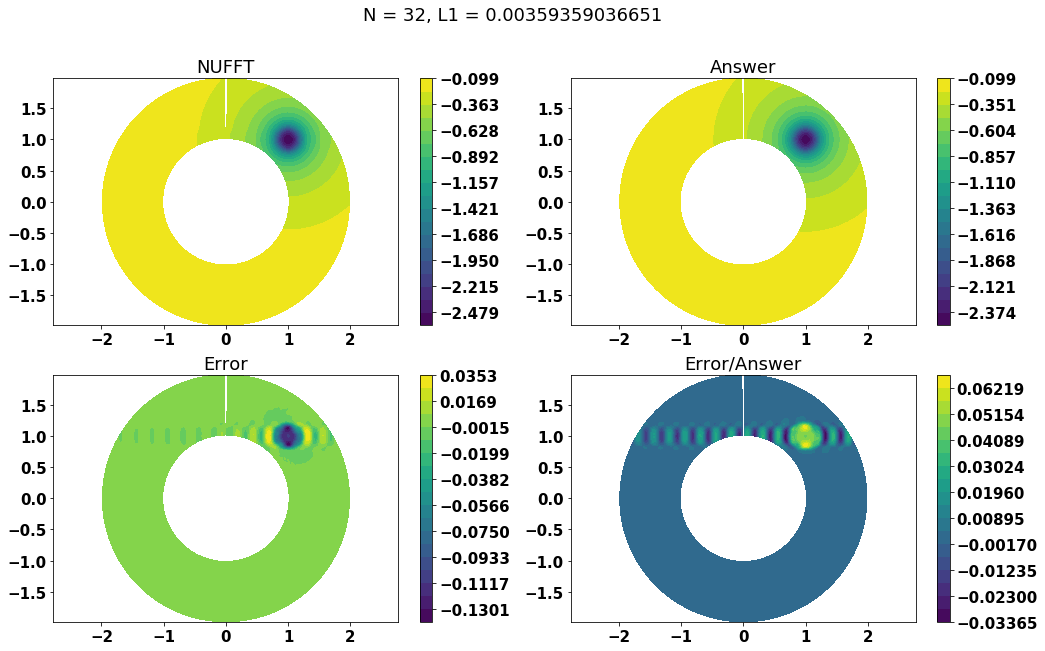

In [15]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_analytic[:,:,plan], 
             levels=np.linspace(np.min(nufft_analytic[:,:,plan]), np.max(nufft_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error[:,:,plan], 
             levels=np.linspace(np.min(nufft_error[:,:,plan]), np.max(nufft_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(nufft_L1))